In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance/DATA (1).csv


GOAL: DETERMINE FACTORS THAT HELP TO IMPROVE PERFORMANCE

In [3]:
stu_perf = pd.read_csv('/kaggle/input/students-performance/DATA (1).csv')

In [4]:
stu_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STUDENT ID  145 non-null    object
 1   1           145 non-null    int64 
 2   2           145 non-null    int64 
 3   3           145 non-null    int64 
 4   4           145 non-null    int64 
 5   5           145 non-null    int64 
 6   6           145 non-null    int64 
 7   7           145 non-null    int64 
 8   8           145 non-null    int64 
 9   9           145 non-null    int64 
 10  10          145 non-null    int64 
 11  11          145 non-null    int64 
 12  12          145 non-null    int64 
 13  13          145 non-null    int64 
 14  14          145 non-null    int64 
 15  15          145 non-null    int64 
 16  16          145 non-null    int64 
 17  17          145 non-null    int64 
 18  18          145 non-null    int64 
 19  19          145 non-null    int64 
 20  20        

In [5]:
stu_perf.head()

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [6]:
stu_perf.isnull().sum()

STUDENT ID    0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16            0
17            0
18            0
19            0
20            0
21            0
22            0
23            0
24            0
25            0
26            0
27            0
28            0
29            0
30            0
COURSE ID     0
GRADE         0
dtype: int64

There are no null fields.

In [7]:
#Trying to understand the numerical columns
stu_perf['1'].max()
#The highest value of the numerical columns is 3

3

In [8]:
stu_perf.rename({'STUDENT_ID':'Student_ID'},inplace=True)

renaming all columns appropriately in the code below

In [9]:
columns = {}
names=['Student_ID','Stu_age','Sex','High_sch','Scholarship','Additional_work',
       'Reg_art_and_sports','Single','Tot_salary','Transprt_to_uni','Accomodation_type',
      'Mothers_edu','Fathers_edu','sis_bros','Parental_status','Mothers_Occupation','Fathers_Occupation',
      'Weekly_Study_hrs','Reading_freq(non/sc)','Reading_freq(sc)','Attend_seminars(for_dept)','Impact_of_project','Att_class',
       'Prep_midterm_1','Prep_midterm_2','Take_notes(clas)','Listen(clas)','Discussion_improves_suc_and_interest',
      'Flip_Classroom','last_sem_CGPA','Exp_Grad_CGPA','Course_ID','Grade']
stu_perf.columns=names

In [10]:
stu_perf.columns

Index(['Student_ID', 'Stu_age', 'Sex', 'High_sch', 'Scholarship',
       'Additional_work', 'Reg_art_and_sports', 'Single', 'Tot_salary',
       'Transprt_to_uni', 'Accomodation_type', 'Mothers_edu', 'Fathers_edu',
       'sis_bros', 'Parental_status', 'Mothers_Occupation',
       'Fathers_Occupation', 'Weekly_Study_hrs', 'Reading_freq(non/sc)',
       'Reading_freq(sc)', 'Attend_seminars(for_dept)', 'Impact_of_project',
       'Att_class', 'Prep_midterm_1', 'Prep_midterm_2', 'Take_notes(clas)',
       'Listen(clas)', 'Discussion_improves_suc_and_interest',
       'Flip_Classroom', 'last_sem_CGPA', 'Exp_Grad_CGPA', 'Course_ID',
       'Grade'],
      dtype='object')

Now i will change the values of each field in the column appropriately.

In [11]:
stu_perf_anal = stu_perf.drop(['Student_ID'],axis=1)

In [12]:
stu_perf_anal.corr()['Grade'].reset_index().sort_values('Grade',ascending=False)

,index,Grade
31,Grade,1.000000
1,Sex,0.335533
28,last_sem_CGPA,0.315493
29,Exp_Grad_CGPA,0.248588
17,Reading_freq(non/sc),0.195617
4,Additional_work,0.167445
26,Discussion_improves_suc_and_interest,0.146547
30,Course_ID,0.142166
27,Flip_Classroom,0.110617
2,High_sch,0.104821


The first stage of analysis will be around the columns listed below. There is a slight correlation between high grades and these columns.

Sex	0.335533
last_sem_CGPA	0.315493
Exp_Grad_CGPA	0.248588

In [13]:
stu_perf_anal['Sex'].corr(stu_perf_anal['last_sem_CGPA'])
#Shows that male are more likely to have higher last semester CGPA's

0.24103339450585987

In [15]:
#confirming the correlation
males = stu_perf_anal[stu_perf_anal['Sex']==2]
females = stu_perf_anal[stu_perf_anal['Sex']==1]

In [16]:
males.shape[0]

87

In [17]:
females.shape[0]

58

There are 87 males and 58 females and this could contribute to the supposed correlation between 'last semester CGPA' and the sex.

In [18]:
males.columns

Index(['Stu_age', 'Sex', 'High_sch', 'Scholarship', 'Additional_work',
       'Reg_art_and_sports', 'Single', 'Tot_salary', 'Transprt_to_uni',
       'Accomodation_type', 'Mothers_edu', 'Fathers_edu', 'sis_bros',
       'Parental_status', 'Mothers_Occupation', 'Fathers_Occupation',
       'Weekly_Study_hrs', 'Reading_freq(non/sc)', 'Reading_freq(sc)',
       'Attend_seminars(for_dept)', 'Impact_of_project', 'Att_class',
       'Prep_midterm_1', 'Prep_midterm_2', 'Take_notes(clas)', 'Listen(clas)',
       'Discussion_improves_suc_and_interest', 'Flip_Classroom',
       'last_sem_CGPA', 'Exp_Grad_CGPA', 'Course_ID', 'Grade'],
      dtype='object')

In [30]:
males.corr()

,Stu_age,Sex,High_sch,Scholarship,Additional_work,Reg_art_and_sports,Single,Tot_salary,Transprt_to_uni,Accomodation_type,...,Prep_midterm_1,Prep_midterm_2,Take_notes(clas),Listen(clas),Discussion_improves_suc_and_interest,Flip_Classroom,last_sem_CGPA,Exp_Grad_CGPA,Course_ID,Grade
Stu_age,1.000000,NaN,2.818483e-01,-0.276034,-0.326931,0.138653,0.116266,0.215995,0.022745,-0.099962,...,4.720327e-02,1.392868e-01,-0.048748,0.297067,-0.015800,0.320744,0.274182,0.218867,-0.338871,-0.268068
Sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
High_sch,0.281848,NaN,1.000000e+00,0.145874,-0.259158,-0.049407,0.091581,-0.121710,-0.040525,-0.032808,...,8.003246e-18,-5.368349e-17,0.212082,0.142498,-0.078822,0.084117,0.147077,0.197325,-0.027150,0.020553
Scholarship,-0.276034,NaN,1.458743e-01,1.000000,0.001530,-0.133409,0.026688,-0.205444,0.167126,0.125862,...,6.408481e-02,-3.844783e-02,0.031606,0.062814,0.021225,-0.148525,0.290120,0.256216,0.223267,0.122366
Additional_work,-0.326931,NaN,-2.591579e-01,0.001530,1.000000,0.104907,0.008402,-0.110709,0.138896,-0.092022,...,5.763464e-02,-2.021006e-01,-0.086172,-0.205447,0.080066,-0.161702,-0.131567,-0.149682,0.048870,0.152741
Reg_art_and_sports,0.138653,NaN,-4.940726e-02,-0.133409,0.104907,1.000000,0.013730,0.117696,0.009873,-0.104523,...,-5.133635e-02,-9.665953e-02,0.023847,-0.086792,-0.064996,0.084076,-0.095093,-0.122034,-0.209629,-0.152530
Single,0.116266,NaN,9.158143e-02,0.026688,0.008402,0.013730,1.000000,-0.074130,0.122004,-0.101811,...,-1.018349e-01,-7.589772e-02,0.024066,-0.067651,-0.101766,-0.109739,-0.137947,-0.083398,0.023054,-0.073182
Tot_salary,0.215995,NaN,-1.217097e-01,-0.205444,-0.110709,0.117696,-0.074130,1.000000,-0.079075,-0.044024,...,2.112134e-01,1.286460e-01,-0.328453,0.008333,-0.074719,-0.023473,-0.060091,0.013816,-0.152134,-0.175347
Transprt_to_uni,0.022745,NaN,-4.052472e-02,0.167126,0.138896,0.009873,0.122004,-0.079075,1.000000,0.285101,...,-8.125912e-02,-3.661281e-02,0.029123,-0.056585,-0.027059,-0.119531,0.031934,0.132448,0.046834,-0.155121
Accomodation_type,-0.099962,NaN,-3.280792e-02,0.125862,-0.092022,-0.104523,-0.101811,-0.044024,0.285101,1.000000,...,-7.027097e-02,5.794467e-03,0.011965,0.219298,-0.011117,-0.070251,0.015100,0.145289,0.226218,0.144510


In [38]:
females.corr()

,Stu_age,Sex,High_sch,Scholarship,Additional_work,Reg_art_and_sports,Single,Tot_salary,Transprt_to_uni,Accomodation_type,...,Prep_midterm_1,Prep_midterm_2,Take_notes(clas),Listen(clas),Discussion_improves_suc_and_interest,Flip_Classroom,last_sem_CGPA,Exp_Grad_CGPA,Course_ID,Grade
Stu_age,1.000000,NaN,0.291127,-0.339334,-3.588057e-02,0.067075,-4.458080e-02,0.009934,-0.039096,-0.310601,...,-0.215995,-0.186003,-4.352092e-01,0.225061,-0.273893,-0.025497,-0.081861,-0.201351,-0.209283,0.111245
Sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
High_sch,0.291127,NaN,1.000000,-0.336729,-9.634316e-02,0.164964,-4.821039e-02,-0.128033,0.131671,0.035813,...,-0.057637,-0.129599,-1.524239e-01,0.160293,-0.107272,-0.053229,-0.213909,-0.262213,-0.115828,0.145108
Scholarship,-0.339334,NaN,-0.336729,1.000000,2.273395e-01,-0.085375,2.077351e-01,-0.028869,-0.225394,-0.139512,...,-0.048877,0.071834,3.860484e-01,-0.136785,0.363050,0.106433,0.318119,0.448972,0.303729,0.064053
Additional_work,-0.035881,NaN,-0.096343,0.227340,1.000000e+00,0.285202,2.942710e-01,-0.122457,0.058418,-0.164416,...,-0.454794,-0.322811,1.634734e-16,-0.031241,0.053036,0.197750,0.142826,0.101837,-0.120823,0.048631
Reg_art_and_sports,0.067075,NaN,0.164964,-0.085375,2.852020e-01,1.000000,2.256851e-02,0.009555,0.065207,-0.306675,...,-0.225686,-0.151456,-1.453498e-01,0.221493,-0.016996,0.100984,-0.000465,-0.250801,-0.318413,-0.151103
Single,-0.044581,NaN,-0.048210,0.207735,2.942710e-01,0.022569,1.000000e+00,-0.093588,-0.124902,-0.308217,...,-0.361213,0.043047,8.298060e-17,-0.098062,0.166475,0.035325,0.136741,0.227417,0.009418,0.112221
Tot_salary,0.009934,NaN,-0.128033,-0.028869,-1.224569e-01,0.009555,-9.358787e-02,1.000000,0.077633,0.098323,...,0.218861,-0.063087,-1.291588e-01,-0.130701,0.021816,-0.047004,-0.145972,-0.157553,-0.142776,-0.166438
Transprt_to_uni,-0.039096,NaN,0.131671,-0.225394,5.841780e-02,0.065207,-1.249022e-01,0.077633,1.000000,0.408609,...,0.114127,-0.212340,1.540374e-02,0.035760,-0.312213,-0.238671,-0.149184,-0.248527,0.226701,-0.174741
Accomodation_type,-0.310601,NaN,0.035813,-0.139512,-1.644163e-01,-0.306675,-3.082172e-01,0.098323,0.408609,1.000000,...,0.394135,0.010823,1.495701e-01,0.012860,-0.018354,-0.156699,-0.120515,-0.106127,0.234126,-0.007784


All correlations between relevant columns are weak.

Checking the percentage of grades for both genders.

In [61]:
females['Grade'].value_counts(normalize=True)*100

Grade
1    27.586207
2    20.689655
0    13.793103
3    12.068966
5    10.344828
4     8.620690
6     6.896552
Name: proportion, dtype: float64

Text(0, 0.5, '')

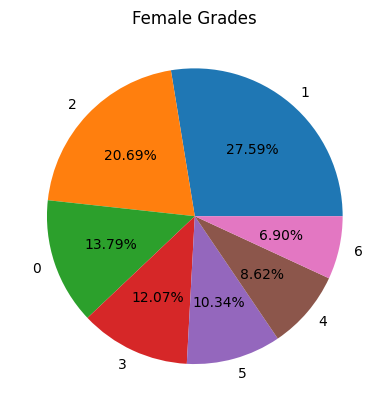

In [55]:
#Displaying the distribution in a graph
females['Grade'].value_counts(normalize=True).plot.pie(autopct='%.2f%%')
plt.title('Female Grades')
plt.ylabel('')

In [62]:
males['Grade'].value_counts(normalize=True)*100

Grade
1    21.839080
7    19.540230
3    16.091954
2    13.793103
5    12.643678
6    10.344828
4     5.747126
Name: proportion, dtype: float64

Text(0, 0.5, '')

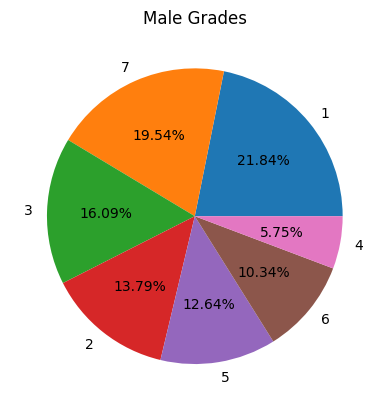

In [56]:
males['Grade'].value_counts(normalize=True).plot.pie(autopct='%.2f%%')
plt.title('Male Grades')
plt.ylabel('')

GRADE column- 
0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA

Males generally perform better than females.
A significant percentage of males got the highest grade possible while no female did.And also, there is a somewhat even distribution of grades between males.

Now I will perform further analysis to know why.

In [63]:
males_1 = males[males['Grade']==1]

In [66]:
males_1['Stu_age'].value_counts()

Stu_age
2    10
1     7
3     2
Name: count, dtype: int64

Age column:
1: 18-21, 2: 22-25, 3: above 26



In [69]:
females_1_0 = females[females['Grade'].isin([1,0])]

In [70]:
females_1_0['Stu_age'].value_counts()

Stu_age
1    12
2    11
3     1
Name: count, dtype: int64

7 males between 18 and 21
12 females between 18 and 21

this suggests that younger students are more likely to get low grades.
We ignore the difference in the numbers from both genders due to the disparity in total number of each gender in the data-set; male(87) and female(58)

In [71]:
females[females['Grade'].isin([7,6,5])]['Stu_age'].value_counts()

Stu_age
2    7
1    3
Name: count, dtype: int64

In [72]:
males[males['Grade'].isin([7,6,5])]['Stu_age'].value_counts()

Stu_age
1    20
2    16
3     1
Name: count, dtype: int64

Younger males in are more likely to outperform females. males between 18-25 to be more specific.

In [73]:
stu_perf_anal[stu_perf_anal['Stu_age']==3]['Grade'].value_counts()

Grade
3    5
1    3
2    1
7    1
Name: count, dtype: int64

In [74]:
males.Additional_work.value_counts()

Additional_work
2    64
1    23
Name: count, dtype: int64

In [75]:
females.Additional_work.value_counts()

Additional_work
2    32
1    26
Name: count, dtype: int64

In [81]:
males[males['Grade'].isin([7,6,5,4])].Additional_work.value_counts(normalize=True)*100

Additional_work
2    78.571429
1    21.428571
Name: proportion, dtype: float64

In [80]:
females[females['Grade'].isin([7,6,5,4])].Additional_work.value_counts(normalize=True)*100

Additional_work
2    53.333333
1    46.666667
Name: proportion, dtype: float64

a large percent of Students of both Genders that score 7,6,5 and 4 grades do not do additional work. 

Checking effect of class attendance on grades.

In [82]:
stu_perf_anal[stu_perf_anal['Grade'].isin([7,6,5,4])].Att_class.value_counts(normalize=True)*100

Att_class
1    78.947368
2    21.052632
Name: proportion, dtype: float64

A large percentage of high scoring students always attend class. 
This is a determining factor of success.

In [87]:
factors=['High_sch', 'Scholarship',
       'Reg_art_and_sports', 'Single', 'Tot_salary', 'Transprt_to_uni',
       'Accomodation_type', 'Mothers_edu', 'Fathers_edu', 'sis_bros',
       'Parental_status', 'Mothers_Occupation', 'Fathers_Occupation',
       'Weekly_Study_hrs', 'Reading_freq(non/sc)', 'Reading_freq(sc)',
       'Attend_seminars(for_dept)', 'Impact_of_project',
       'Prep_midterm_1', 'Prep_midterm_2', 'Take_notes(clas)', 'Listen(clas)',
       'Discussion_improves_suc_and_interest', 'Flip_Classroom',
       'last_sem_CGPA', 'Exp_Grad_CGPA']
frequencies={}
for factor in factors:
    frequencies[factor]=stu_perf_anal[stu_perf_anal['Grade'].isin([7,6,5,4])][factor].value_counts(normalize=True)*100

In [88]:
frequencies

{'High_sch': High_sch
 2    75.438596
 3    14.035088
 1    10.526316
 Name: proportion, dtype: float64,
 'Scholarship': Scholarship
 4    43.859649
 3    40.350877
 5    10.526316
 2     3.508772
 1     1.754386
 Name: proportion, dtype: float64,
 'Reg_art_and_sports': Reg_art_and_sports
 2    50.877193
 1    49.122807
 Name: proportion, dtype: float64,
 'Single': Single
 2    54.385965
 1    45.614035
 Name: proportion, dtype: float64,
 'Tot_salary': Tot_salary
 1    75.438596
 2    17.543860
 3     3.508772
 5     3.508772
 Name: proportion, dtype: float64,
 'Transprt_to_uni': Transprt_to_uni
 1    73.684211
 2    17.543860
 4     8.771930
 Name: proportion, dtype: float64,
 'Accomodation_type': Accomodation_type
 1    45.614035
 2    33.333333
 3    21.052632
 Name: proportion, dtype: float64,
 'Mothers_edu': Mothers_edu
 1    36.842105
 3    22.807018
 4    19.298246
 2    17.543860
 5     1.754386
 6     1.754386
 Name: proportion, dtype: float64,
 'Fathers_edu': Fathers_edu
 3  

According to these. 
Majority of high scoring students are from state high schools.

96% say that projects positively impact their success. This is a determining factor.

75% have salaries between 135 and 210 which means that having lower salaries pushes students to strive for more; another determining factor of high grades.

 'Reading_freq(non/sc)': Reading_freq(non/sc)
 2    68.421053
 3    19.298246
 1    12.280702,
 'Reading_freq(sc)': Reading_freq(sc)
 2    75.438596
 3    12.280702
 1    12.280702
 
 according to the percentage distribution above high scoring students read, more do so sparingly(68% for non-science and 75% for science)

'Mothers_Occupation': Mothers_Occupation
 2  -  70.175439
 4  - 14.035088
 3  - 10.526316
 1  -  5.263158
 
 
2 stands for House-wife; students with mothers with this occupation perform better. it is a determining factor. Having a nurturing person present has an effect.

'Parental_status': Parental_status
 1    87.719298
 3     7.017544
 2     5.263158
 
 1 means married.
 having married parents; a stable home, contributes significantly to success.

In [ ]:
FACTORS WITH HIGH PERCENTAGES AND A LARGE DIFFERENCE IN PROPORTIONS  ARE DETERMINING FACTORS OF SUCCESS.